# DATA MINING 2 PROJECT





## Data Understanding & Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./dm2_dataset_2425_imdb/imdb.csv')


print("Shape del dataset:", df.shape)
print("\nInfo generali:")
df.info()
print("\nPrime righe:")
df.head()

=== CARICAMENTO DATASET TABELLARE ===
Shape del dataset: (149531, 32)

Info generali:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149531 entries, 0 to 149530
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                149531 non-null  object 
 1   rating                       149531 non-null  object 
 2   startYear                    149531 non-null  int64  
 3   endYear                      149531 non-null  object 
 4   runtimeMinutes               149531 non-null  object 
 5   awardWins                    149531 non-null  int64  
 6   numVotes                     149531 non-null  int64  
 7   worstRating                  149531 non-null  int64  
 8   bestRating                   149531 non-null  int64  
 9   totalImages                  149531 non-null  int64  
 10  totalVideos                  149531 non-null  int64  
 11  totalCredits                 14

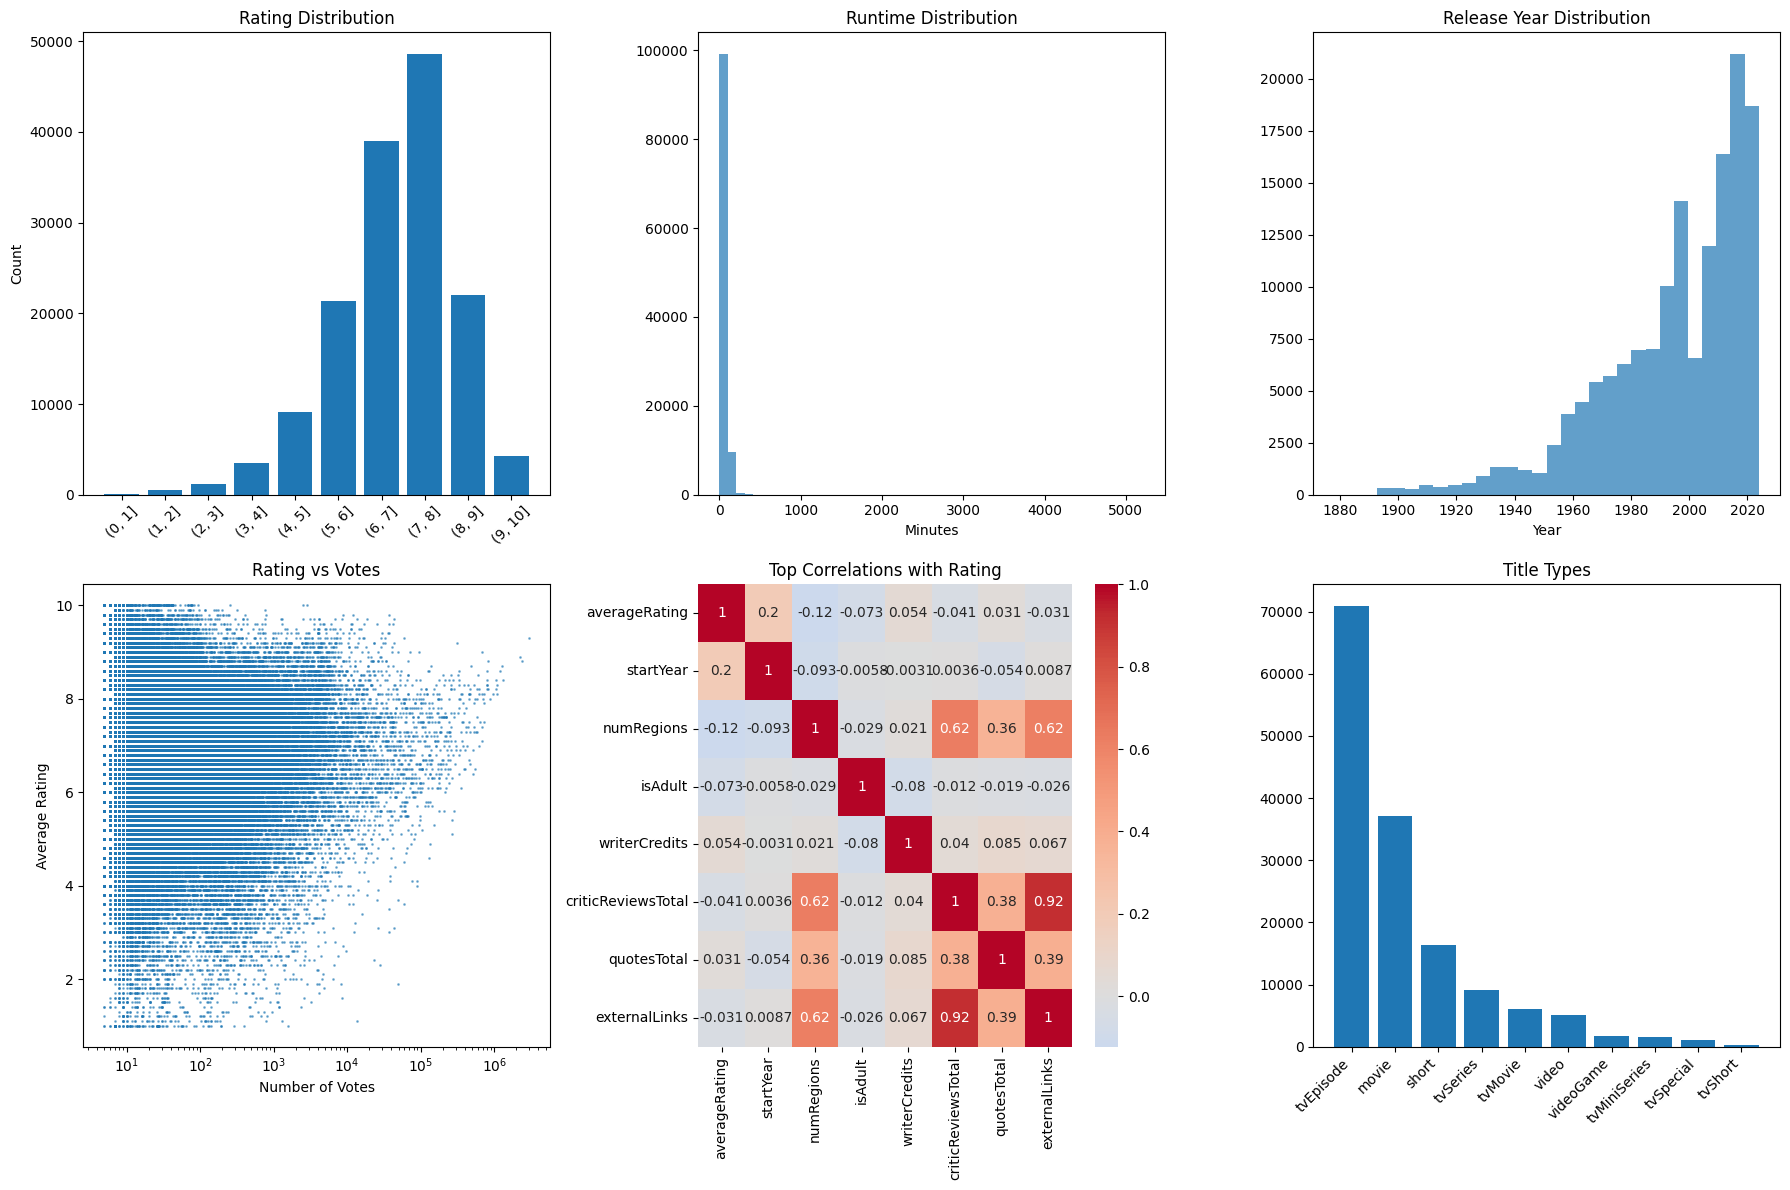


Dataset processato salvato come df_processed: (149531, 48)
Preprocessing completato!

=== CARICAMENTO DATASET TIME SERIES ===
Shape TS: (1134, 104)

Info Time Series:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Columns: 104 entries, id to rating_category
dtypes: float64(101), object(3)
memory usage: 921.5+ KB

=== ANALISI ESPLORATIVA TIME SERIES ===
Numero di time series: 104
Lunghezza serie: 1134

Statistiche time series:
Valore medio globale: 1453539.08
Deviazione standard globale: 2345659.88
Range globale: 2.80 - 157461641.00

=== PREPROCESSING TIME SERIES ===
Time series columns: 101
Metadata columns: ['id', 'genre', 'rating_category']
Valori mancanti totali: 0
Applicata trasformazione logaritmica
Time series normalizzate (0-1)

Dimensioni per analisi: 101 serie di lunghezza 104

=== VISUALIZZAZIONI TIME SERIES ===


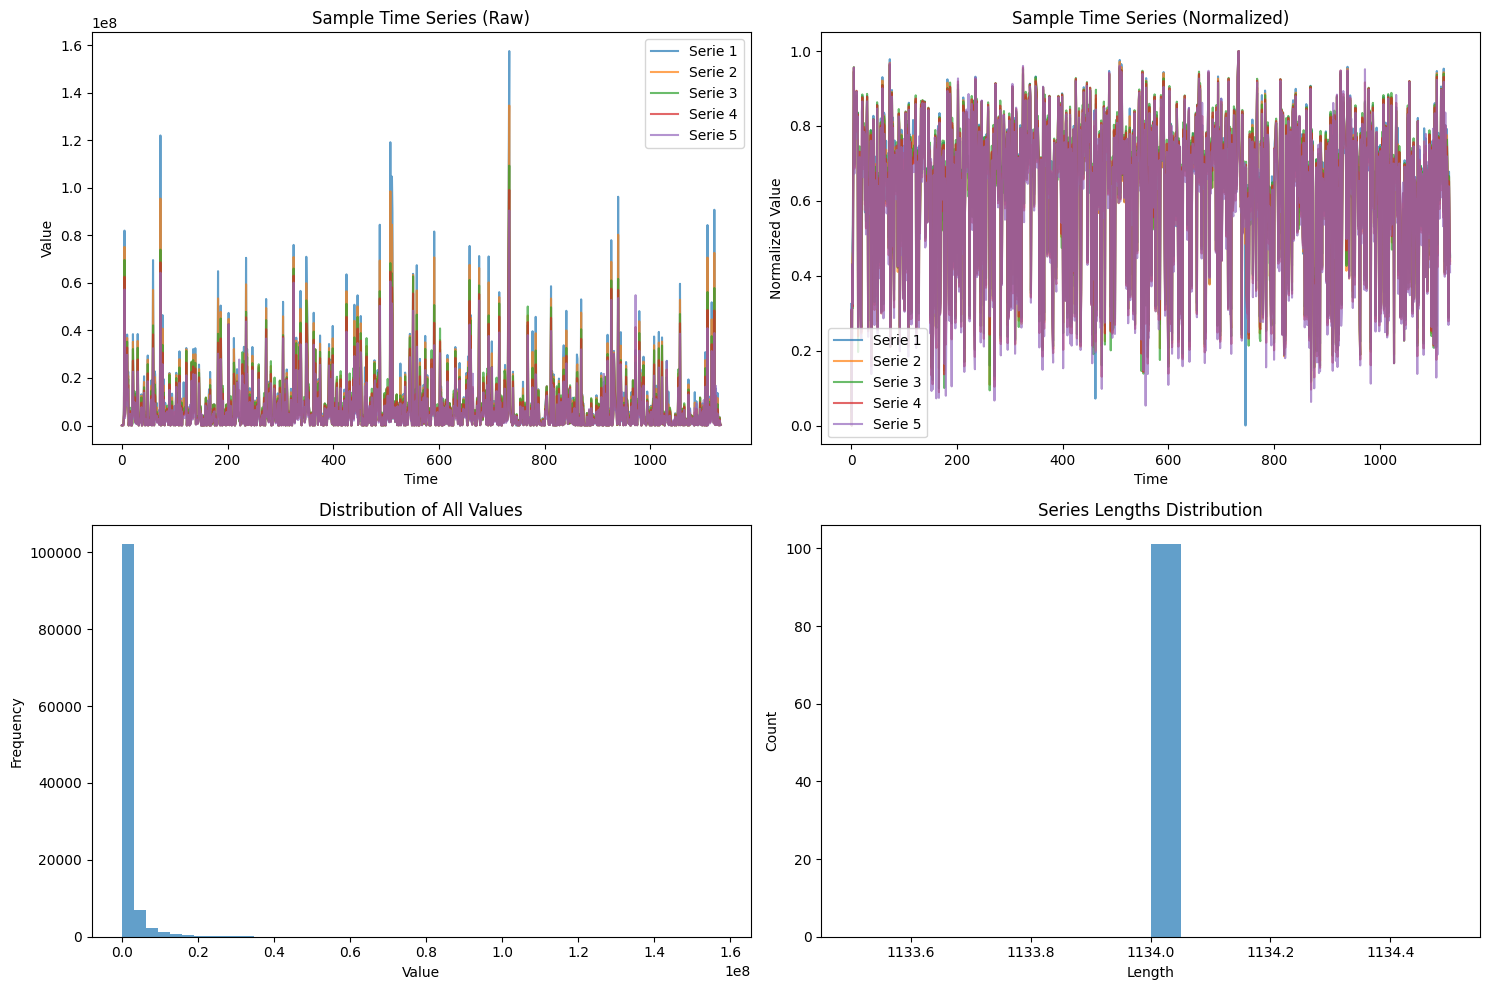

Time series preprocessing completato!
Dataset processato: ts_data_processed ((1134, 104))
Dataset normalizzato: ts_normalized ((1134, 104))

MODULE 0 COMPLETATO!
Dataset tabellare e time series pronti per Module 1, 2, 3


In [13]:
# ================================
# MODULE 0: DATA UNDERSTANDING & PREPARATION
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# ================================
# TABULAR DATASET
# ================================

print("=== CARICAMENTO DATASET TABELLARE ===")
df = pd.read_csv('./dm2_dataset_2425_imdb/imdb.csv')

print("Shape del dataset:", df.shape)
print("\nInfo generali:")
df.info()

# ================================
# 1. EXPLORE & ANALYZE STRUCTURE
# ================================

print("\n=== CARATTERISTICHE CHIAVE ===")
print(f"Dimensioni: {df.shape}")
print(f"Memoria utilizzata: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Valori mancanti
print(f"\nValori mancanti:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False))

# Duplicati
print(f"\nDuplicati: {df.duplicated().sum()}")

# Tipi di dati problematici
print(f"\nColonne object che potrebbero essere numeriche:")
for col in df.select_dtypes(include=['object']).columns:
    if col in ['runtimeMinutes', 'endYear']:
        print(f"{col}: {df[col].unique()[:10]}")

# ================================
# 2. DISTRIBUZIONE VARIABILI CHIAVE
# ================================

print("\n=== DISTRIBUZIONI TARGET E VARIABILI CHIAVE ===")

# Target principale: rating
print("Rating distribution:")
rating_dist = df['rating'].value_counts().sort_index()
print(rating_dist)

# Altre variabili categoriche importanti
print(f"\nTitle types: {df['titleType'].nunique()} categorie")
print(df['titleType'].value_counts().head())

print(f"\nGenres: {df['genres'].nunique()} combinazioni")
print(df['genres'].value_counts().head())

print(f"\nCountries: {df['countryOfOrigin'].nunique()} paesi")
print(df['countryOfOrigin'].value_counts().head())

# ================================
# 3. STATISTICHE DESCRITTIVE
# ================================

print("\n=== STATISTICHE DESCRITTIVE ===")
print("\nVariabili numeriche:")
numeric_stats = df.describe()
print(numeric_stats)

print("\nVariabili categoriche:")
categorical_stats = df.describe(include=['object'])
print(categorical_stats)

# ================================
# 4. CORRELAZIONI
# ================================

print("\n=== ANALISI CORRELAZIONI ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Top correlazioni con averageRating
if 'averageRating' in correlation_matrix.columns:
    rating_corr = correlation_matrix['averageRating'].abs().sort_values(ascending=False)
    print("Top correlazioni con averageRating:")
    print(rating_corr.head(10))

# ================================
# 5. DATA PREPROCESSING
# ================================

print("\n=== PREPROCESSING ===")

# Copia per preprocessing
df_processed = df.copy()

# 5.1 Fix IMDb missing values ('\\N' -> NaN)
df_processed['runtimeMinutes'] = df_processed['runtimeMinutes'].replace('\\N', np.nan)
df_processed['endYear'] = df_processed['endYear'].replace('\\N', np.nan)

# Convert to numeric
df_processed['runtimeMinutes'] = pd.to_numeric(df_processed['runtimeMinutes'])
df_processed['endYear'] = pd.to_numeric(df_processed['endYear'])

print(f"runtimeMinutes - Missing: {df_processed['runtimeMinutes'].isnull().sum()}")
print(f"endYear - Missing: {df_processed['endYear'].isnull().sum()}")

# 5.2 Rimuovi colonne costanti/inutili
df_processed = df_processed.drop(['worstRating', 'bestRating'], axis=1)
print("Rimosse colonne costanti: worstRating, bestRating")
print("\nEncoding variabili categoriche...")

# 5.3 Encoding categorical variables
print("\nEncoding variabili categoriche...")

# Rating è già ordinale - mapping diretto
rating_map = {'(0, 1]': 0, '(1, 2]': 1, '(2, 3]': 2, '(3, 4]': 3, '(4, 5]': 4,
              '(5, 6]': 5, '(6, 7]': 6, '(7, 8]': 7, '(8, 9]': 8, '(9, 10]': 9}
df_processed['rating_numeric'] = df_processed['rating'].map(rating_map)
print(f"Rating mapped: {rating_map}")

# One-hot encoding per titleType
if df_processed['titleType'].nunique() <= 10:
    title_dummies = pd.get_dummies(df_processed['titleType'], prefix='titleType')
    df_processed = pd.concat([df_processed, title_dummies], axis=1)
    print(f"TitleType one-hot encoded: {title_dummies.columns.tolist()}")

# Gestione genres (multiple genres)
df_processed['genre_count'] = df_processed['genres'].str.count(',') + 1
df_processed['is_single_genre'] = (df_processed['genre_count'] == 1).astype(int)
print("Aggiunte feature per genres: genre_count, is_single_genre")

# 5.4 Feature Engineering - CREATE NEW VARIABLES
print("\nCreazione nuove variabili...")

# Durata del progetto (per TV series)
df_processed['project_duration'] = df_processed['endYear'] - df_processed['startYear']
df_processed['project_duration'] = df_processed['project_duration'].fillna(0)

# Rating popularity score
df_processed['popularity_score'] = df_processed['numVotes'] * df_processed['averageRating']

# Awards total
df_processed['total_awards'] = df_processed['awardWins'] + df_processed['awardNominationsExcludeWins']

# Content richness score
df_processed['content_richness'] = (df_processed['totalImages'] + 
                                  df_processed['totalVideos'] + 
                                  df_processed['totalCredits'] + 
                                  df_processed['quotesTotal'])

# Decade
df_processed['decade'] = (df_processed['startYear'] // 10) * 10

print("Nuove variabili create:")
new_vars = ['project_duration', 'popularity_score', 'total_awards', 'content_richness', 'decade']
for var in new_vars:
    print(f"  {var}: min={df_processed[var].min()}, max={df_processed[var].max()}")

# 5.5 Feature Scaling
print("\nFeature scaling...")
numeric_cols_for_scaling = df_processed.select_dtypes(include=[np.number]).columns
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col not in ['rating_encoded']]

scaler = StandardScaler()
df_scaled = df_processed.copy()
df_scaled[numeric_cols_for_scaling] = scaler.fit_transform(df_processed[numeric_cols_for_scaling])

print(f"Scaled {len(numeric_cols_for_scaling)} numeric columns")

# ================================
# VISUALIZZAZIONI
# ================================

print("\n=== VISUALIZZAZIONI ===")

# Setup
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Rating distribution
rating_counts = df['rating'].value_counts().sort_index()
axes[0,0].bar(range(len(rating_counts)), rating_counts.values)
axes[0,0].set_xticks(range(len(rating_counts)))
axes[0,0].set_xticklabels(rating_counts.index, rotation=45)
axes[0,0].set_title('Rating Distribution')
axes[0,0].set_ylabel('Count')

# 2. Runtime distribution
axes[0,1].hist(df_processed['runtimeMinutes'].dropna(), bins=50, alpha=0.7)
axes[0,1].set_title('Runtime Distribution')
axes[0,1].set_xlabel('Minutes')

# 3. Years distribution
axes[0,2].hist(df['startYear'], bins=30, alpha=0.7)
axes[0,2].set_title('Release Year Distribution')
axes[0,2].set_xlabel('Year')

# 4. Average rating vs num votes
axes[1,0].scatter(df['numVotes'], df['averageRating'], alpha=0.5, s=1)
axes[1,0].set_xlabel('Number of Votes')
axes[1,0].set_ylabel('Average Rating')
axes[1,0].set_title('Rating vs Votes')
axes[1,0].set_xscale('log')

# 5. Top correlations heatmap
top_corr_cols = correlation_matrix['averageRating'].abs().nlargest(8).index
corr_subset = correlation_matrix.loc[top_corr_cols, top_corr_cols]
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Top Correlations with Rating')

# 6. Title type distribution
title_counts = df['titleType'].value_counts().head(10)
axes[1,2].bar(range(len(title_counts)), title_counts.values)
axes[1,2].set_xticks(range(len(title_counts)))
axes[1,2].set_xticklabels(title_counts.index, rotation=45, ha='right')
axes[1,2].set_title('Title Types')

plt.tight_layout()
plt.show()

print(f"\nDataset processato salvato come df_processed: {df_processed.shape}")
print("Preprocessing completato!")

# ================================
# TIME SERIES DATASET
# ================================

print("\n" + "="*50)
print("=== CARICAMENTO DATASET TIME SERIES ===")

# Assumendo che sia un CSV con time series
try:
    ts_data = pd.read_csv('./dm2_dataset_2425_imdb/imdb_ts.csv')  # Adatta il path
    print("Shape TS:", ts_data.shape)
    print("\nInfo Time Series:")
    ts_data.info()
    
    # ================================
    # TIME SERIES EXPLORATORY ANALYSIS
    # ================================
    
    print("\n=== ANALISI ESPLORATIVA TIME SERIES ===")
    
    # Struttura base
    print(f"Numero di time series: {ts_data.shape[0] if ts_data.shape[0] < ts_data.shape[1] else ts_data.shape[1]}")
    print(f"Lunghezza serie: {ts_data.shape[1] if ts_data.shape[0] < ts_data.shape[1] else ts_data.shape[0]}")
    
    # Statistiche base
    print("\nStatistiche time series:")
    print(f"Valore medio globale: {ts_data.select_dtypes(include=[np.number]).mean().mean():.2f}")
    print(f"Deviazione standard globale: {ts_data.select_dtypes(include=[np.number]).std().mean():.2f}")
    print(f"Range globale: {ts_data.select_dtypes(include=[np.number]).min().min():.2f} - {ts_data.select_dtypes(include=[np.number]).max().max():.2f}")
    
    # ================================
    # TIME SERIES PREPROCESSING
    # ================================
    
    print("\n=== PREPROCESSING TIME SERIES ===")
    
    # Separa time series da metadata
    metadata_cols = ts_data.select_dtypes(include=['object']).columns
    ts_cols = [col for col in ts_data.columns if col not in metadata_cols]
    
    print(f"Time series columns: {len(ts_cols)}")
    print(f"Metadata columns: {list(metadata_cols)}")
    
    # Gestione valori mancanti nelle serie
    missing_ts = ts_data[ts_cols].isnull().sum().sum()
    print(f"Valori mancanti totali: {missing_ts}")
    
    ts_data_processed = ts_data.copy()
    if missing_ts > 0:
        # Forward fill per continuità temporale
        ts_data_processed[ts_cols] = ts_data_processed[ts_cols].fillna(method='ffill', axis=1)
        print("Applicato forward fill")
    
    # Log transformation per stabilizzare varianza (box office)
    ts_log = ts_data_processed.copy()
    ts_log[ts_cols] = np.log1p(ts_data_processed[ts_cols])  # log(1+x) per evitare log(0)
    print("Applicata trasformazione logaritmica")
    
    # Normalizzazione 0-1 per clustering/classification
    scaler_ts = MinMaxScaler()
    ts_normalized = ts_log.copy()
    ts_normalized[ts_cols] = scaler_ts.fit_transform(ts_log[ts_cols])
    
    print("Time series normalizzate (0-1)")
    
    # Check se dataset troppo grande per alcune analisi
    n_series = len(numeric_ts_cols) if len(numeric_ts_cols) < 1000 else ts_data.shape[0]
    series_length = ts_data.shape[1] if len(numeric_ts_cols) < 1000 else len(numeric_ts_cols)
    
    print(f"\nDimensioni per analisi: {n_series} serie di lunghezza {series_length}")
    
    if n_series > 1000 or series_length > 1000:
        print("⚠️  Dataset grande - considera approssimazioni (SAX, PAA) per clustering/motif detection")
        
        # Esempio PAA (Piecewise Aggregate Approximation)
        def apply_paa(series, n_segments=50):
            """Riduce la serie a n_segments usando la media"""
            segment_size = len(series) // n_segments
            return [series[i:i+segment_size].mean() for i in range(0, len(series), segment_size)][:n_segments]
        
        print(f"Esempio PAA: riduzione a {50} segmenti")
    
    # ================================
    # VISUALIZZAZIONI TIME SERIES
    # ================================
    
    print("\n=== VISUALIZZAZIONI TIME SERIES ===")
    
    plt.figure(figsize=(15, 10))
    
    # Sample di time series
    plt.subplot(2, 2, 1)
    n_sample = min(5, n_series)
    for i in range(n_sample):
        if len(numeric_ts_cols) < 1000:
            plt.plot(ts_data_processed[numeric_ts_cols[i]], alpha=0.7, label=f'Serie {i+1}')
        else:
            plt.plot(ts_data_processed.iloc[i], alpha=0.7, label=f'Serie {i+1}')
    plt.title('Sample Time Series (Raw)')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Value')
    
    # Serie normalizzate
    plt.subplot(2, 2, 2)
    for i in range(n_sample):
        if len(numeric_ts_cols) < 1000:
            plt.plot(ts_normalized[numeric_ts_cols[i]], alpha=0.7, label=f'Serie {i+1}')
        else:
            plt.plot(ts_normalized.iloc[i], alpha=0.7, label=f'Serie {i+1}')
    plt.title('Sample Time Series (Normalized)')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Normalized Value')
    
    # Distribuzione valori
    plt.subplot(2, 2, 3)
    all_values = ts_data_processed[numeric_ts_cols].values.flatten() if len(numeric_ts_cols) < 1000 else ts_data_processed.select_dtypes(include=[np.number]).values.flatten()
    plt.hist(all_values[~np.isnan(all_values)], bins=50, alpha=0.7)
    plt.title('Distribution of All Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Lunghezze serie (se variabili)
    plt.subplot(2, 2, 4)
    if len(numeric_ts_cols) < 1000:
        lengths = [ts_data_processed[col].notna().sum() for col in numeric_ts_cols]
    else:
        lengths = [ts_data_processed.iloc[i].notna().sum() for i in range(min(100, ts_data.shape[0]))]
    plt.hist(lengths, bins=20, alpha=0.7)
    plt.title('Series Lengths Distribution')
    plt.xlabel('Length')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    print("Time series preprocessing completato!")
    print(f"Dataset processato: ts_data_processed ({ts_data_processed.shape})")
    print(f"Dataset normalizzato: ts_normalized ({ts_normalized.shape})")
    
except FileNotFoundError:
    print("⚠️  File time series non trovato. Aggiorna il path del file.")
    print("Struttura directory attesa: ./dm2_dataset_2425_imdb/timeseries.csv")

print("\n" + "="*50)
print("MODULE 0 COMPLETATO!")
print("Dataset tabellare e time series pronti per Module 1, 2, 3")

## Advanced Data-Preprocessing


###     Imbalanced Learning

### Dimensionality Reduction

 ### Anomaly Detection

## Advanced ML & XAI

### Logistic Regression

### Support Vector Machines



### Neural Networks



### Ensamble Methods



### Gradient Boosting



### Rule-based Classifiers

## Time Series Analysis

### Time Series Similarity

### Approximation

### Motif

### Shapelets

### Classification

### Clustering